Figure to capture behavior-related data that doesn't belong in Figure 1.

In [1]:
import scipy.stats as s
import numpy as np
import matplotlib.pyplot as plt
from os import path
import seaborn as sns

# Import project specific modules and enable automatic reloading
import sys
from pathlib import Path
import os
eraser_path = Path(os.getcwd()).parent
reinstatement_path = eraser_path.parent / 'FearReinstatement'
sys.path.append(str(eraser_path))
sys.path.append(str(reinstatement_path))
%load_ext autoreload
%autoreload 2

import eraser_reference as err
import er_plot_functions as er
from plotting import Fig, pretty_plot

[8.5  4.75]


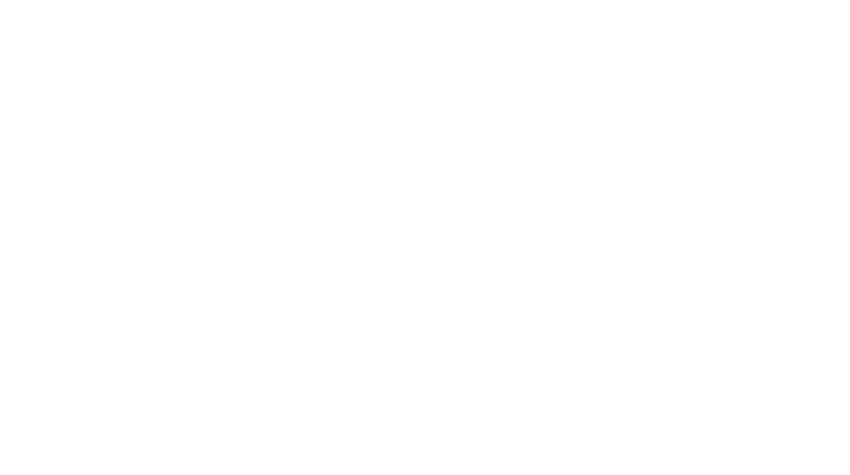

In [7]:
# Set up main figure plotting
%matplotlib ipympl
FigS1 = Fig(num=1, grid=(3, 4), size=(8.5, 4.75), fontsize=6)
print(FigS1.fig.get_size_inches())

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 4']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 1']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble14_10Hz/20180818_1_openfield: nbadpts = 488 max_in_a_row = 82
['Unknown file missing and/or IndexError for Marble14 Open 7']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4


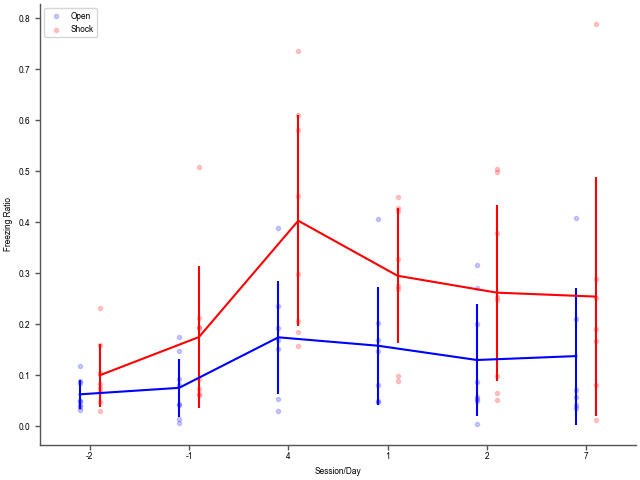

In [3]:
# Get freezing ratios for future calculations
figc, axc, fratio_cont = er.plot_all_freezing(err.control_mice_good, s=9, xoffset=0.1)

/Users/nkinsky/Documents/BU/Working/Eraser/Anisomycin Group/Marble25/20181203_1_openfield: nbadpts = 9 max_in_a_row = 6


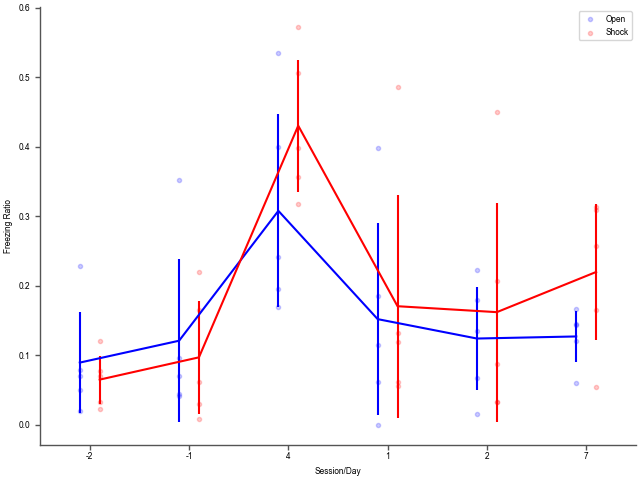

In [4]:
figa, axa, fratio_ani = er.plot_all_freezing(err.ani_mice_good, s=9, xoffset=0.1)

In [8]:
# ANI DI ratios - Plot into supplemental
ahista = FigS1.subplot(341)
DI_aft_ani = ((fratio_ani[0, 3:5, :] - fratio_ani[1, 3:5, :]).reshape(-1))/((fratio_ani[0, 3:5, :] + 
                                                                           fratio_ani[1, 3:5, :]).reshape(-1))

ahista.hist(DI_aft_ani, histtype='step')
ahista.set_title('ANI: After')
ahista.set_xlabel('$DI_{beh}$')

Text(0.5, 0, '$DI_{beh}$')

In [11]:
# Supplemental to anticipate reviewer question: 
# Exclude Marble29 who is freezing a bunch before even being shocked in shock arena
ax29 = FigS1.subplot(342)
figcn29, axcn29, fratio_contn29 = er.plot_all_freezing(err.control_mice_good[0:-1], ax=ax29, s=9, xoffset=0.1)
axcn29.set_ylim([-0.025, 0.80])
axcn29.set_title('Control - No Marble29')

/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble6/20180421_1_openfield: nbadpts = 63 max_in_a_row = 38
['Unknown file missing and/or IndexError for Marble06 Open 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble06 Shock 7']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 4']
Freezing left as NaN for this session
['Unknown file missing and/or IndexError for Marble14 Open 1']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble14_10Hz/20180818_1_openfield: nbadpts = 488 max_in_a_row = 82
['Unknown file missing and/or IndexError for Marble14 Open 7']
Freezing left as NaN for this session
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181126_1_openfield: nbadpts = 18 max_in_a_row = 3
/Users/nkinsky/Documents/BU/Working/Eraser/Control Group/Marble24/20181127_1_openfield: nbadpts = 10 max_in_a_row = 4


Text(0.5, 1.0, 'Control - No Marble29')

In [10]:
# Plot Discrimination Index (DI) ratios for day 1-2
learning_cutoff = -0.35

# Controls
DI_aft = ((fratio_cont[0, 3:5, :] - fratio_cont[1, 3:5, :]).reshape(-1))/((fratio_cont[0, 3:5, :] + 
                                                                           fratio_cont[1, 3:5, :]).reshape(-1))
# subfighist = Fig1.fig.add_subfigure(Fig1.gs[1, 0])
# ahist = subfighist.subplots(1, 2, sharey=True)
ahist = FigS1.subplot(343)
_, bins, cbar = ahist.hist(DI_aft, 6)
ahist.set_ylabel('Count')
ahist.set_xlabel('$DI_{beh}$')
ahist.axvline(learning_cutoff, linestyle='--', color='k')

# ANI - not used due to this being a poor metric if animals don't freeze a lot, only good for specifying
# how specific a memory is in mice that actually freeze.  See next block.
DI_aft_ani = ((fratio_ani[0, 3:5, :] - fratio_ani[1, 3:5, :]).reshape(-1))/((fratio_ani[0, 3:5, :] + 
                                                                           fratio_ani[1, 3:5, :]).reshape(-1))